Hierarchical Clustering


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
all_data = pd.concat([train, test])

In [4]:
train_test = pd.concat([train['text'], test['text']])

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(train_test).todense()

In [6]:
Z = linkage(X, 'ward')

In [17]:
cluster_labels = fcluster(Z, 11, criterion='distance')

In [18]:
all_data['topic'] = cluster_labels

In [19]:
cluster_categories = {
      cluster: all_data.loc[all_data['topic'] == cluster, 'category'].dropna().unique().tolist()
      for cluster in all_data['topic'].unique()
}


cluster_categories

{5: ['card_arrival',
  'card_linking',
  'exchange_rate',
  'card_payment_wrong_exchange_rate',
  'extra_charge_on_statement',
  'pending_cash_withdrawal',
  'fiat_currency_support',
  'card_delivery_estimate',
  'automatic_top_up',
  'card_not_working',
  'exchange_via_app',
  'lost_or_stolen_card',
  'pin_blocked',
  'contactless_not_working',
  'top_up_by_bank_transfer_charge',
  'pending_top_up',
  'cancel_transfer',
  'top_up_limits',
  'wrong_amount_of_cash_received',
  'card_payment_fee_charged',
  'transfer_not_received_by_recipient',
  'getting_virtual_card',
  'card_acceptance',
  'top_up_reverted',
  'balance_not_updated_after_cheque_or_cash_deposit',
  'card_payment_not_recognised',
  'edit_personal_details',
  'why_verify_identity',
  'unable_to_verify_identity',
  'get_physical_card',
  'topping_up_by_card',
  'disposable_card_limits',
  'compromised_card',
  'atm_support',
  'direct_debit_payment_not_recognised',
  'passcode_forgotten',
  'declined_cash_withdrawal',
  'p

In [20]:
number_of_clusters = len(set(all_data['topic']))

print("Number of clusters:", number_of_clusters)

Number of clusters: 5


In [21]:
for cluster in sorted(all_data['topic'].unique()):
    print(f"Cluster {cluster}:")
    display(all_data[all_data['topic'] == cluster].head())
    print("\n")

Cluster 1:


,text,category,topic
4,"How do I know if I will get my card, or if it ...",card_arrival,1
160,If I find a card I lost do I need to dispose o...,card_linking,1
1074,can you express my card to me?,card_delivery_estimate,1
1120,What are the maximum amount you can do for aut...,automatic_top_up,1
1121,I can't find the auto-top up option.,automatic_top_up,1




Cluster 2:


,text,category,topic
294,Do you know the rate of exchange?,exchange_rate,2
295,What foreign exchange rate will I get on weekd...,exchange_rate,2
296,What is the exchange looking like?,exchange_rate,2
297,How is the exchange rate doing?,exchange_rate,2
302,How do I know what exchange rate I will get?,exchange_rate,2




Cluster 3:


,text,category,topic
3,Can I track my card while it is in the process...,card_arrival,3
5,When did you send me my new card?,card_arrival,3
6,Do you have info about the card on delivery?,card_arrival,3
8,Does the package with my card have tracking?,card_arrival,3
12,Can you track my card for me?,card_arrival,3




Cluster 4:


,text,category,topic
96,Shouldn't my new card be here by now?,card_arrival,4
545,I am being charged the wrong amount on my card.,card_payment_wrong_exchange_rate,4
571,Why is there an extra fee on my statement?,extra_charge_on_statement,4
572,Why did they charge me an extra $1?,extra_charge_on_statement,4
573,Why is there a 1 euro fee on my statement?,extra_charge_on_statement,4




Cluster 5:


,text,category,topic
0,I am still waiting on my card?,card_arrival,5
1,What can I do if my card still hasn't arrived ...,card_arrival,5
2,I have been waiting over a week. Is the card s...,card_arrival,5
7,What do I do if I still have not received my n...,card_arrival,5
9,I ordered my card but it still isn't here,card_arrival,5


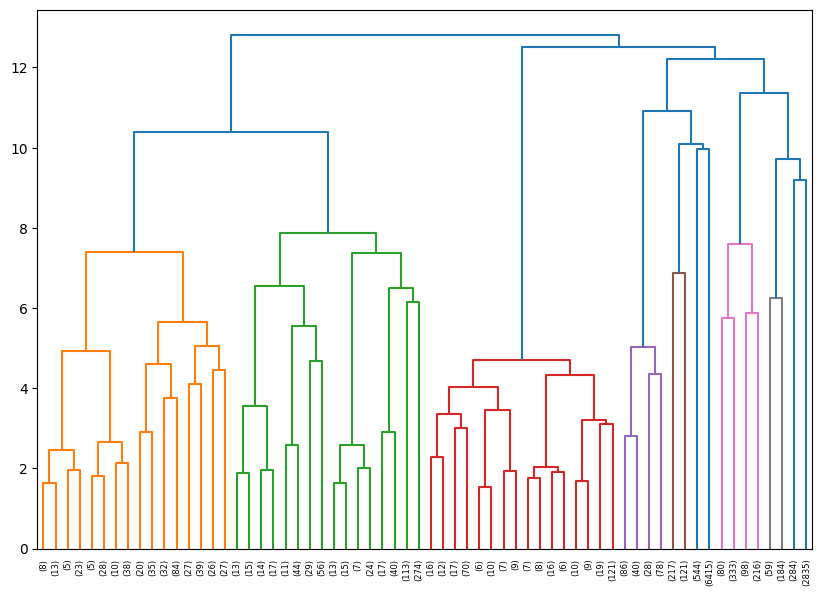

In [22]:
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)
plt.show()